In [1]:
import keras
from keras.datasets import mnist   # dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import backend as K
import numpy as np

C:\Program Files\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pickle

In [3]:
f=open("trainX.pickle","rb")

In [4]:
images=pickle.load(f)

In [5]:
type(images)


numpy.ndarray

In [6]:
f=open("trainY.pickle","rb")
labels = pickle.load(f)

In [7]:
from sklearn import model_selection

In [8]:
#input image dimensions
img_rows, img_cols=28,28

#the data shuffled and split between train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(images, labels)

In [51]:
X_train.shape

(45000, 28, 28)

In [52]:
X_test.shape

(15000, 28, 28)

In [53]:
y_train.shape

(45000,)

In [54]:
y_test.shape

(15000,)

In [55]:
K.image_data_format()  

'channels_last'

In [9]:
if K.image_data_format() =='channels_first':
    X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
    X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, )
    input_shape=(img_rows, img_cols, 1)

In [57]:
print(input_shape)

(28, 28, 1)


In [10]:
batch_size = 128            # 1 back propagation on 1batch values as : 2^x
num_classes =10
epochs=100

In [11]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
X_train/=255
X_test/=255
print(('X_train_ shape:', X_train.shape))
print((X_train.shape[0], 'train samples'))
print((X_test.shape[0], 'test samples'))

#pixels 0-255 .. so 0-1 p normalize    therfore /255
y_train  = keras.utils.to_categorical(y_train,num_classes)
y_test= keras.utils.to_categorical(y_test,num_classes)


('X_train_ shape:', (45000, 28, 28))
(45000, 'train samples')
(15000, 'test samples')


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [12]:
X_train = np.reshape(X_train,(45000,784))
X_test = np.reshape(X_test,(15000,784))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_2 (Dense)              (None, 300)               307500    
__________

In [36]:
X_train.shape

(45000, 28, 28, 1)

In [29]:
X_test.shape

(15000, 28, 28, 1)

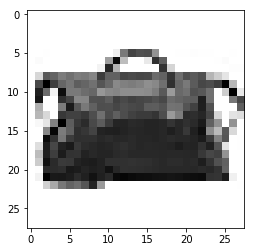

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(1-X_train[0][:, :, 0], cmap='gray')

In [31]:
y_test.shape

(45000, 10, 2, 2)

In [22]:


model = Sequential()
model.add(Dense(500, input_dim=784))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])

W0621 16:23:19.065753  5996 deprecation_wrapper.py:119] From C:\Program Files\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 16:23:19.091736  5996 deprecation_wrapper.py:119] From C:\Program Files\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 16:23:19.095040  5996 deprecation_wrapper.py:119] From C:\Program Files\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 16:23:19.191405  5996 deprecation_wrapper.py:119] From C:\Program Files\anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 16:23:19.211208  5996 deprecation_wrapper.py:119] From C:\Program File

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,
         batch_size=batch_size,
         epochs=10,
         verbose=1,
         validation_data=(X_test,y_test))
score = model.evaluate(X_test,y_test,verbose=0)
print(('test Loss : ', score[0]))
print(('test accuracy :', score[1]))

W0621 16:23:27.228838  5996 deprecation.py:323] From C:\Users\Meenakshi Sharma\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0621 16:23:27.408997  5996 deprecation_wrapper.py:119] From C:\Program Files\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 10s 233us/step - loss: 0.6059 - acc: 0.7800 - val_loss: 0.5206 - val_acc: 0.7875
Epoch 2/10
45000/45000 [==============================] - 10s 223us/step - loss: 0.4104 - acc: 0.8482 - val_loss: 0.3899 - val_acc: 0.8555
Epoch 3/10
45000/45000 [==============================] - 10s 221us/step - loss: 0.3623 - acc: 0.8658 - val_loss: 0.3590 - val_acc: 0.8680
Epoch 4/10
45000/45000 [==============================] - 10s 219us/step - loss: 0.3291 - acc: 0.8780 - val_loss: 0.3531 - val_acc: 0.8717
Epoch 5/10
45000/45000 [==============================] - 10s 225us/step - loss: 0.3069 - acc: 0.8850 - val_loss: 0.3509 - val_acc: 0.8677
Epoch 6/10
45000/45000 [==============================] - 10s 221us/step - loss: 0.2909 - acc: 0.8900 - val_loss: 0.3624 - val_acc: 0.8666
Epoch 7/10
45000/45000 [==============================] - 10s 221us/step - loss: 0.2763 - acc: 0.8960 - val_loss: 0.